# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?) 

2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?                                                                                                                                                                                                                            
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

1. In order to clean the `Price` variable, I chose to write a short script that took in the csv file, particularly at the `Price` header. This script then removed dollar signs and commas and finally converted the values to floats. When I calculated the missing values, I got no missing values. However, when I took out the option to clean the commas, I got an error stating a value (one with a comma) could not be read.

In [1]:
import pandas as pd

# Load Airbnb dataset
df_airbnb = pd.read_csv(r"C:\Users\Brian\wrangling\assignment\data\airbnb_hw.csv")

# Remove '$' sign and commas, then convert to float
df_airbnb['Price'] = df_airbnb['Price'].replace('[\$,]', '', regex=True).astype(float)

# Count missing values
missing_price = df_airbnb['Price'].isna().sum()

print(f"Missing values in Price: {missing_price}")

Missing values in Price: 0


2. When running my script, the proportion of the values missing in the `subject_injury` was 76.19%, which is a HUGE proportion. This is a concern as we don't even know if three quarters of the police interaction involved injury. When applying cross tabulation, the only pattern I can recognize is that most of the time (other than with irritants) when there is a high number if missing values, the proportion of `Yes` to `No` is higher by a significant margin. For instance, under `Bodily Force`, there were 7051 missing values. Of the values that were there, 1286 were `Yes` and 1093 were `No`.

In [2]:
# Load Minnesota police dataset
df_police = pd.read_csv(r"C:\Users\Brian\wrangling\assignment\data\mn_police_use_of_force.csv")

# Standardize injury column: Yes = injury, No = no injury
df_police['subject_injury'] = df_police['subject_injury'].str.strip().str.lower()
df_police['subject_injury'] = df_police['subject_injury'].replace({
    'yes': 'Yes',
    'no': 'No'
})

# Count missing values
missing_injury = df_police['subject_injury'].isna().mean()
print(f"Proportion of missing subject_injury: {missing_injury:.2%}")

# Cross-tabulate subject_injury and force_type
crosstab = pd.crosstab(df_police['subject_injury'], df_police['force_type'], dropna=False)
print(crosstab)

Proportion of missing subject_injury: 76.19%
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   
NaN                 2          7051               1421        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Yes                            44                 40            0   
NaN                            27                 74           87   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                            0   
Yes                                  2                      

3. Below is my code for the third part:

In [3]:
#Read in pretrial data
df_pretrial = pd.read_csv(r"C:\Users\Brian\Downloads\October 2017 Cohort_Virginia Pretrial Data Project_Deidentified FINAL Update_10272021.csv")

# Replace pretrial values (0, 1, and 9) with those listed in the guide (Not Released, Released, Unclear respectively)
df_pretrial['WhetherDefendantWasReleasedPretrial'] = df_pretrial['WhetherDefendantWasReleasedPretrial'].replace({
    0: "Not Released",
    1: "Released",
    9: "Unclear"
})

# Replace missing values with np.nan
df_pretrial['WhetherDefendantWasReleasedPretrial'] = df_pretrial['WhetherDefendantWasReleasedPretrial'].replace('', pd.NA)

print(df_pretrial['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False))

C:\Users\Brian\AppData\Local\Temp\ipykernel_30092\3306956294.py:2: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,

WhetherDefendantWasReleasedPretrial
Released        19154
Not Released     3801
Unclear            31
Name: count, dtype: int64


4. Below is my code for part 4:

In [4]:
#Check missingness pattern
missing_sentences = df_pretrial['ImposedSentenceAllChargeInContactEvent'].isna()
related_variable = df_pretrial.loc[missing_sentences, 'SentenceTypeAllChargesAtConvictionInContactEvent']

# Fill missing values where appropriate
df_pretrial['ImposedSentenceAllChargeInContactEvent'] = df_pretrial.apply(
    lambda row: 'No Sentence' if pd.isna(row['ImposedSentenceAllChargeInContactEvent']) and row['SentenceTypeAllChargesAtConvictionInContactEvent'] in ['Acquitted', 'Dismissed']
    else row['ImposedSentenceAllChargeInContactEvent'],
    axis=1
)

# Convert numeric sentences to a float
df_pretrial['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df_pretrial['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

print(df_pretrial['ImposedSentenceAllChargeInContactEvent'].value_counts(dropna=False))


ImposedSentenceAllChargeInContactEvent
NaN           9053
0.000000      4953
12.000000     1404
0.985626      1051
6.000000       809
              ... 
30.328542        1
37.971253        1
50.464066        1
286.000000       1
175.000000       1
Name: count, Length: 484, dtype: int64


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

**1.**

In [5]:
%pip install xlrd
import xlrd
import matplotlib.pyplot as plt

# Read in dataset 
df = pd.read_excel(r"C:\Users\Brian\wrangling\data\GSAF5.xls", engine="xlrd")

# Display the first few rows
print(df.head())


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\Brian\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


                  Date    Year        Type        Country  \
0  2025-01-11 00:00:00  2025.0    Provoked            USA   
1  2025-01-02 00:00:00  2025.0  Unprovoked  New Caledonia   
2  2025-01-02 00:00:00  2025.0  Unprovoked      Australia   
3  2024-12-29 00:00:00  2024.0  Unprovoked          Egypt   
4  2024-12-29 00:00:00  2024.0  Unprovoked          Egypt   

                 State                                 Location      Activity  \
0               Hawaii            Off Haleiwa Boat Harbour Oahu        Diving   
1         Grande Terre              Islet of Kendek near Koumac  Spearfishing   
2      South Australia  Granites Beach near Westall Streaky Bay       Surfing   
3  North of Marsa Alam                                  Red Sea  SCUBA Diving   
4  North of Marsa Alam                                  Red Sea  SCUBA Diving   

                                     Name Sex Age  ...  \
0  Male not stated was a dive tour worker   M  23  ...   
1                        Rober

**2.**

In [6]:
# Drop empty columns
df = df.dropna(axis=1, how="all")

# Show remaining columns
print(df.columns)

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


**3.**

Year range: 0.0 - 2026.0


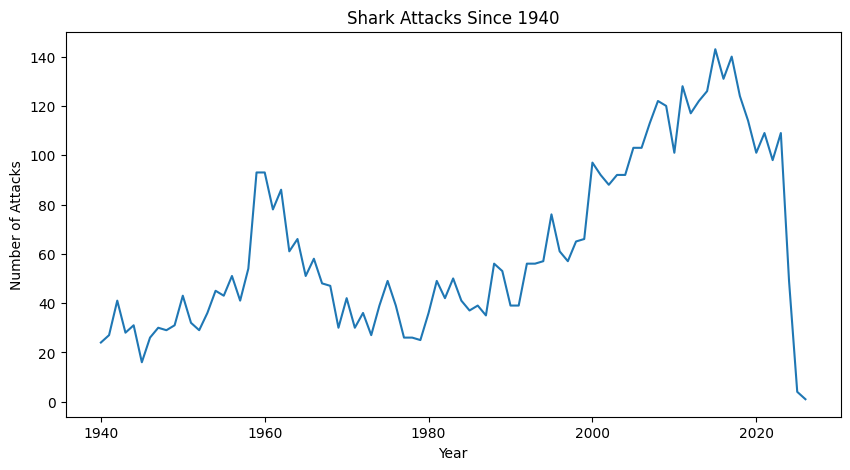

In [7]:
# Convert Year column to numeric, dropping non numeric values
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Check the range of values
print(f"Year range: {df['Year'].min()} - {df['Year'].max()}")

#Filter for years 1940 and later
df_recent = df[df["Year"] >= 1940]

# plot the number of shark attacks over time (since 1940)
df_recent.groupby("Year").size().plot(kind="line", figsize=(10, 5), title="Shark Attacks Since 1940")
plt.ylabel("Number of Attacks")
plt.show()


The range of values above tells me that I should have also looked for zeroes in the dataset. I'm assuming these mean that the year was simply not marked and they just decided to put down a number.

**4.**

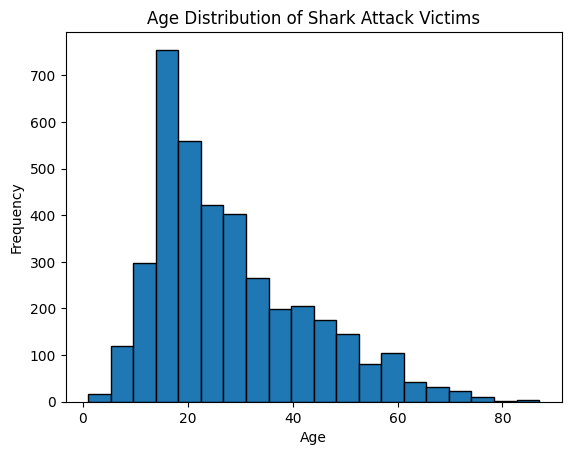

In [8]:
# Convert age to numeric, dropping non numeric values
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# plot histogram of ages
df["Age"].dropna().plot(kind="hist", bins=20, edgecolor="black", title="Age Distribution of Shark Attack Victims")
plt.xlabel("Age")
plt.show()


**5.**

In [9]:
# Normalizatoin
df["Sex"] = df["Sex"].str.strip().str.upper()  #Ensures consistency

# Calculate male proportion
male_proportion = df["Sex"].value_counts(normalize=True).get("M", 0)
print(f"Proportion of male victims: {male_proportion:.2%}")


Proportion of male victims: 87.57%


**6.**

In [10]:
# Normalize (make lower case)
df["Type"] = df["Type"].str.strip().str.lower()
print(df["Type"].value_counts())

# Handle null values before mapping
df["Type"] = df["Type"].fillna("unknown")

# Map values (had to put unprovoked first because I was running into isssues where it would delete any unprovoked row)
df["Type"] = df["Type"].apply(lambda x: "unprovoked" if "unprovoked" in str(x) else 
                                        "provoked" if "provoked" in str(x) else                                         
                                        "unknown")

# print unique values for debug reasons
print(df["Type"].unique())

# Proportion of unprovoked attacks
unprovoked_proportion = (df["Type"] == "unprovoked").mean()
print(f"Proportion of unprovoked attacks: {unprovoked_proportion:.2%}")



Type
unprovoked             5151
provoked                639
invalid                 552
watercraft              355
sea disaster            242
questionable             22
boat                      7
unconfirmed               1
?                         1
unverified                1
under investigation       1
Name: count, dtype: int64
['provoked' 'unprovoked' 'unknown']
Proportion of unprovoked attacks: 73.69%


**7.**

In [11]:
# Normalize (make lower case)
df["Fatal Y/N"] = df["Fatal Y/N"].str.strip().str.lower()
print(df["Fatal Y/N"].value_counts())

# Handle null values before mapping
df["Fatal Y/N"] = df["Fatal Y/N"].fillna("Unknown")

# Map values (had to put unprovoked first because I was running into isssues where it would delete any unprovoked row)
df["Fatal Y/N"] = df["Fatal Y/N"].apply(lambda x: "Y" if "y" in str(x) else 
                                        "N" if "n" in str(x) else                                         
                                        "Unknown")

# print unique values for debug reasons
print(df["Fatal Y/N"].unique())

Fatal Y/N
n          4879
y          1469
unknown      71
f             4
m             3
nq            1
y x 2         1
Name: count, dtype: int64
['N' 'Y' 'Unknown']


**8.**

In [12]:
#unprovoked attack rates by gender
count_unprovoked = pd.crosstab(df['Sex'], df['Type']=="unprovoked", normalize='index')
print("Unprovoked attack rates by gender:\n", count_unprovoked)

# Fatality rates by attack type
fatal_by_type = pd.crosstab(df["Type"], df["Fatal Y/N"], normalize="index")
print("Fatality rates by attack type:\n", fatal_by_type)

#Fatality rates by gender
fatal_by_gender = pd.crosstab(df["Sex"], df["Fatal Y/N"], normalize="index")
print("Fatality rates by gender:\n", fatal_by_gender)

Unprovoked attack rates by gender:
 Type     False    True 
Sex                    
.      1.00000  0.00000
F      0.15404  0.84596
LLI    0.00000  1.00000
M      0.23192  0.76808
M X 2  1.00000  0.00000
N      1.00000  0.00000
Fatality rates by attack type:
 Fatal Y/N          N   Unknown         Y
Type                                    
provoked    0.965571  0.001565  0.032864
unknown     0.833333  0.002500  0.164167
unprovoked  0.756358  0.000582  0.243060
Fatality rates by gender:
 Fatal Y/N         N   Unknown         Y
Sex                                    
.          0.000000  0.000000  1.000000
F          0.848485  0.000000  0.151515
LLI        1.000000  0.000000  0.000000
M          0.777877  0.001247  0.220876
M X 2      0.000000  0.000000  1.000000
N          0.500000  0.000000  0.500000


It appears that attacked women (0.84596) are more likely to be attacked by an unprovoked shark than men (0.76808). 
For fatality rates, it appears that unprovoked attacks are more fatal than provoked or unprovoked.
Lastly, men (0.220876) are more likely to be involved in fatalities with sharks than women (0.151515).
Overall, I'm not the biggest fan of sharks, but if a stray animal entered our homes, we would probably want to get rid of it even if it isn't provoking us.

**9.**

In [13]:
# Normalize species column (lowercase!)
df["Species "] = df["Species "].str.lower()

# Count white shark mentions
white_shark_count = df["Species "].str.contains("white shark", na=False).sum()
white_shark_proportion = white_shark_count / len(df)

print(f"Proportion of attacks by white sharks: {white_shark_proportion:.2%}")

Proportion of attacks by white sharks: 10.01%


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper discusses data tidying, which is a crucial but often overlooked aspect of data cleaning. Tidy datasets have a specific structure - each variable is a column, each observation is a row, and each type of observational unit is a table. The paper introduces a standardized approach to data tidying, making analysis easier by ensuring consistency in data structures.
2. The tidy data standard aims to simplify data cleaning by providing a structured way to organize datasets. It helps with initial exploration, analysis, and the development of tools that work seamlessly together. Instead of spending time on formatting, analysts can focus on actual problem solving.
3. The first analogy suggests that tidy datasets follow a consistent structure, making them easier to work with, while messy datasets vary widely in structure, requiring different cleaning approaches. The second sentence means that while it’s intuitive to identify observations and variables in a specific dataset, providing a universal definition that applies to all datasets is challenging because different datasets are structured differently.
4. ***Values:*** individual data points, either numbers (when quantitative) or strings (for qualitative). ***Variables:*** A collection of values that measure the same characteristic across units (think height, temperature, etc.). ***Observations:*** A collection of values recorded for the same unit across different attributes.
5. Tidy data is defined as: Each variable forming a column, each observation forming a row, and each type of observation unit forming a table. Wickham goes onto explain how this is essentially Codd's 3rd normal form (which is used for relational databases) but for statistical analysis.
6. The five most common problems with messy datasets are: column headers are values and not variable names, mulitple variables are stored in one column, variables are stored in bothe rows and columns, multiple types of observational units are stored in the same table, and a single observational unit is stored in multiple tables. The data in table 4 are messy because column headers are values, not variable names, making it hard to analyze. Melting a dataset refers to reshaping it so that variables become columns, and observations become rows, following the tidy data format.
7. Table 11 is messy because it has one column per day, making it incredibly inefficient and hard to read due to width. Table 12 is way more tidy and considered "molten" because it transforms the structure of Table 11 by melting it into a more tidy format, with each row representing a single day's observation instead of having separate columns for each day.
8. Tidy tools are linked to tidy data and tidy data is only as useful as the tools that operate with it, but data is rarely tidy to begin with, making it hard to prepare data before analysis for most users. Wickham hopes that, in the future, more research and development will lead to better tools that make data tidying more efficient and effective

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?